<a href="https://colab.research.google.com/github/Nilesh219/Git-In/blob/master/catsvsdogs_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [13]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:11<00:00, 160MB/s]
100% 1.06G/1.06G [00:11<00:00, 99.1MB/s]


In [15]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [79]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [17]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [18]:
# Normalize
def process(image, label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

  train_ds = train_ds.map(process)
  validation_ds = validation_ds.map(process)

In [80]:
# create CNN model
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3), padding='valid', activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [81]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_3 (Bat  (None, 254, 254, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_4 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [82]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [83]:
histroy = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 65s 100ms/step - loss: 1.2247 - accuracy: 0.5878 - val_loss: 0.6384 - val_accuracy: 0.6494
Epoch 2/10
625/625 [==============================] - 66s 104ms/step - loss: 0.5800 - accuracy: 0.6934 - val_loss: 0.6133 - val_accuracy: 0.6732
Epoch 3/10
625/625 [==============================] - 66s 105ms/step - loss: 0.4921 - accuracy: 0.7583 - val_loss: 0.5524 - val_accuracy: 0.7182
Epoch 4/10
625/625 [==============================] - 66s 105ms/step - loss: 0.4409 - accuracy: 0.7902 - val_loss: 0.7183 - val_accuracy: 0.6792
Epoch 5/10
625/625 [==============================] - 66s 105ms/step - loss: 0.4179 - accuracy: 0.8066 - val_loss: 0.6850 - val_accuracy: 0.6278
Epoch 6/10
625/625 [==============================] - 64s 102ms/step - loss: 0.3464 - accuracy: 0.8408 - val_loss: 0.4336 - val_accuracy: 0.8112
Epoch 7/10
625/625 [==============================] - 64s 101ms/step - loss: 0.2821 - accuracy: 0.8753 - val_loss: 0.5830 - val_ac

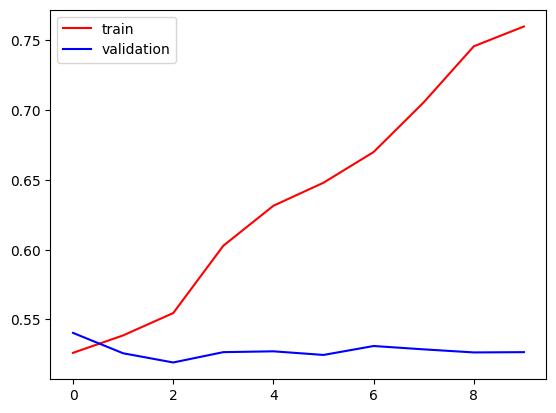

In [25]:
import matplotlib.pyplot as plt

plt.plot(histroy.history['accuracy'], color='red',label='train')
plt.plot(histroy.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

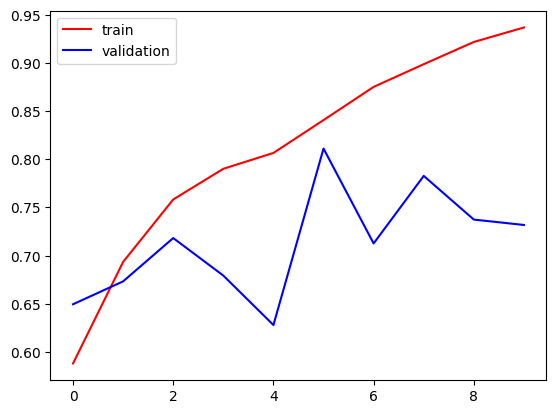

In [84]:
plt.plot(histroy.history['accuracy'],color='red',label='train')
plt.plot(histroy.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

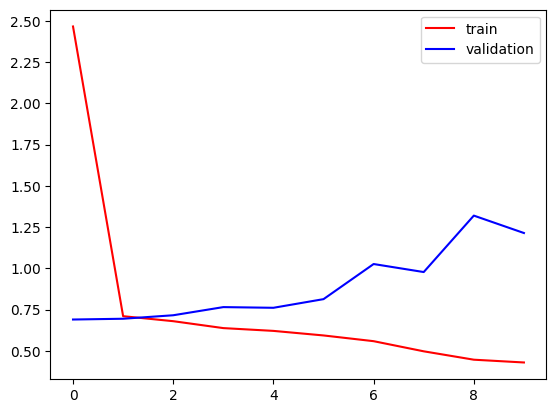

In [26]:
plt.plot(histroy.history['loss'],color='red',label='train')
plt.plot(histroy.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

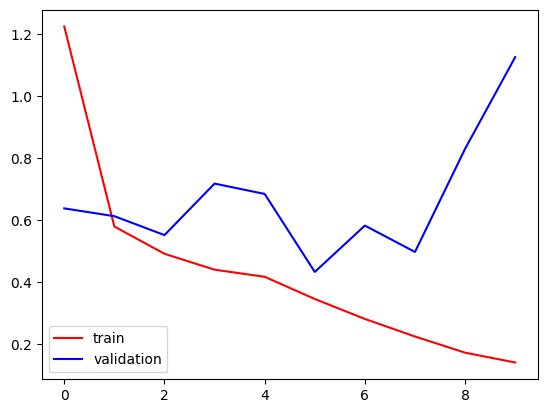

In [85]:
plt.plot(histroy.history['loss'],color='red',label='train')
plt.plot(histroy.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
# ways to reduce overfitting

#Dropout
#Batch Norm

In [86]:
import cv2

In [93]:
test_img = cv2.imread('/content/dog.jpg')

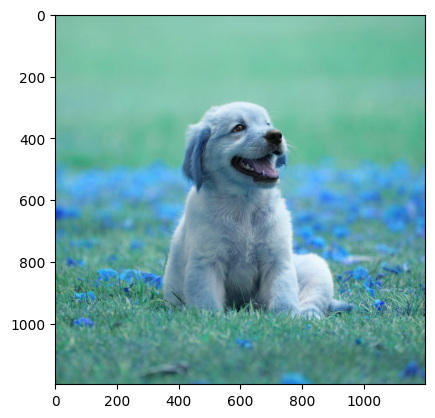

In [94]:
plt.imshow(test_img)

In [95]:
test_img.shape

(1197, 1200, 3)

In [96]:
test_img = cv2.resize(test_img,(256,256))

In [97]:
test_input = test_img.reshape((1,256,256,3))

In [98]:
# If it give Zero it is cat and one it will be dog img pridection

model.predict(test_input)

1/1 [==============================] - 0s 28ms/step


array([[0.9935534]], dtype=float32)

In [99]:
test_img = cv2.imread('/content/cat.jpg')

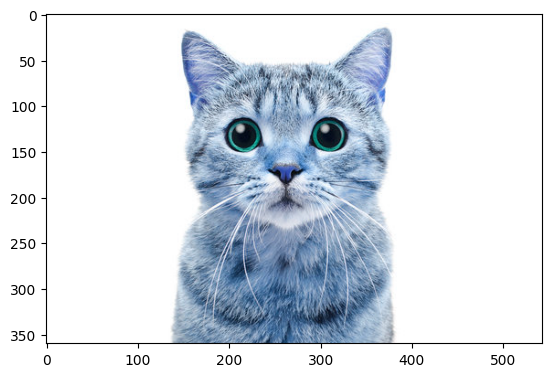

In [100]:
plt.imshow(test_img)

In [101]:
test_img.shape

(360, 543, 3)

In [102]:
test_img = cv2.resize(test_img,(256,256))

In [105]:
test_input = test_img.reshape((1,256,256,3))

In [106]:
# If it give Zero it is cat and one it will be dog img pridection

model.predict(test_input)1ms/step
array([[0.

1/1 [==============================] - 0s 21ms/step


array([[0.00117626]], dtype=float32)